In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, precision_score, recall_score, f1_score
df=pd.read_csv('student_study_habits.csv')
df.head()

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,participation_level_Low,participation_level_Medium,internet_access_Yes,parental_education_High School,parental_education_Master's,parental_education_PhD,extracurricular_Yes,part_time_job_Yes
0,0.527230,0.685236,0.993245,0.222222,71.104897,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.421400,0.881883,0.883478,0.555556,62.240021,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.552393,0.220286,0.683469,1.000000,65.268855,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.698283,0.612594,0.520094,0.222222,66.609921,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.405419,0.369871,0.831127,0.333333,58.967484,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   study_hours_per_week            500 non-null    float64
 1   sleep_hours_per_day             500 non-null    float64
 2   attendance_percentage           500 non-null    float64
 3   assignments_completed           500 non-null    float64
 4   final_grade                     500 non-null    float64
 5   participation_level_Low         500 non-null    float64
 6   participation_level_Medium      500 non-null    float64
 7   internet_access_Yes             500 non-null    float64
 8   parental_education_High School  500 non-null    float64
 9   parental_education_Master's     500 non-null    float64
 10  parental_education_PhD          500 non-null    float64
 11  extracurricular_Yes             500 non-null    float64
 12  part_time_job_Yes               500 

In [15]:
df.isnull().sum()

study_hours_per_week              0
sleep_hours_per_day               0
attendance_percentage             0
assignments_completed             0
final_grade                       0
participation_level_Low           0
participation_level_Medium        0
internet_access_Yes               0
parental_education_High School    0
parental_education_Master's       0
parental_education_PhD            0
extracurricular_Yes               0
part_time_job_Yes                 0
dtype: int64

In [16]:
skewness=df.skew()
print(skewness)

study_hours_per_week              0.173201
sleep_hours_per_day               0.057551
attendance_percentage            -0.395270
assignments_completed             0.023763
final_grade                       0.091283
participation_level_Low           1.488933
participation_level_Medium        0.064226
internet_access_Yes              -2.500398
parental_education_High School    1.050754
parental_education_Master's       1.300555
parental_education_PhD            3.156717
extracurricular_Yes              -0.487183
part_time_job_Yes                 0.793930
dtype: float64


# skewness is small for numerical column

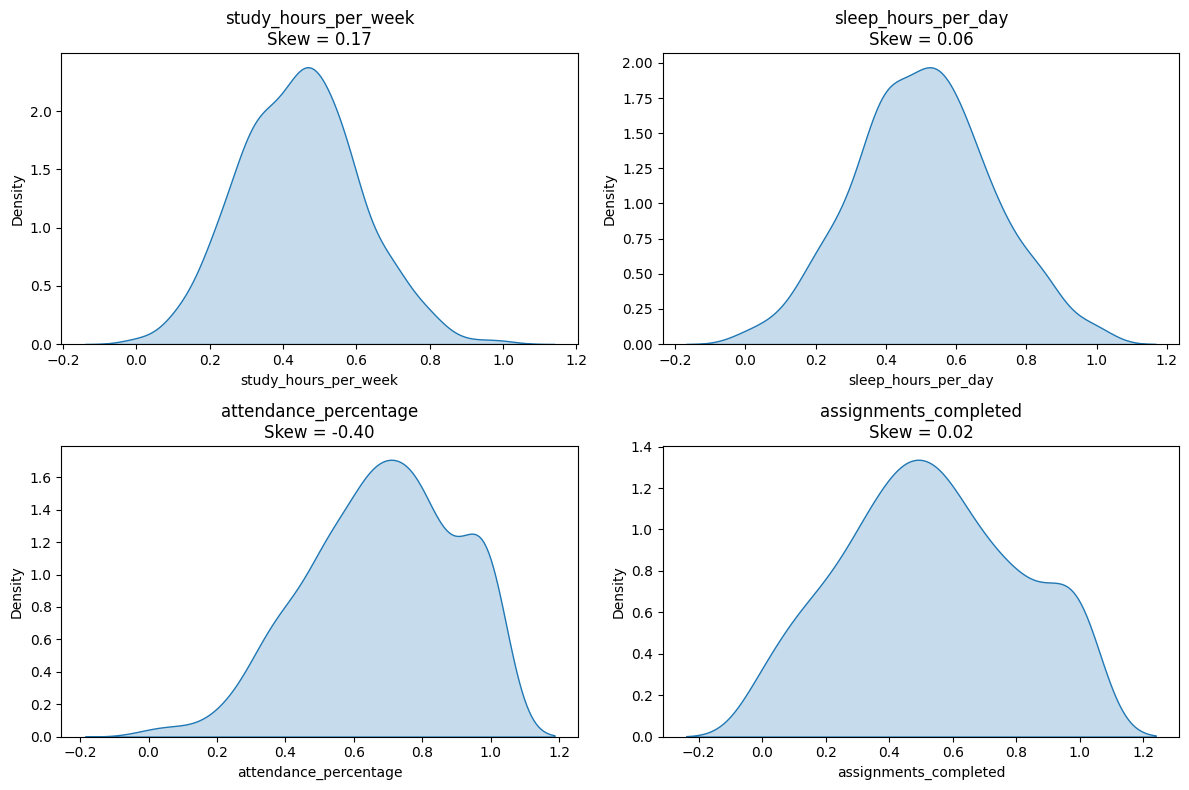

In [17]:
skewness = df.skew(numeric_only=True)
num_cols = ['study_hours_per_week', 'sleep_hours_per_day',
            'attendance_percentage', 'assignments_completed']
plt.figure(figsize=(12,8))
plotnum = 1
for i in num_cols:
    plt.subplot(2, 2, plotnum)
    sns.kdeplot(df[i], fill=True)
    plt.title(f"{i}\nSkew = {skewness[i]:.2f}")
    plotnum += 1
plt.tight_layout()
plt.show()


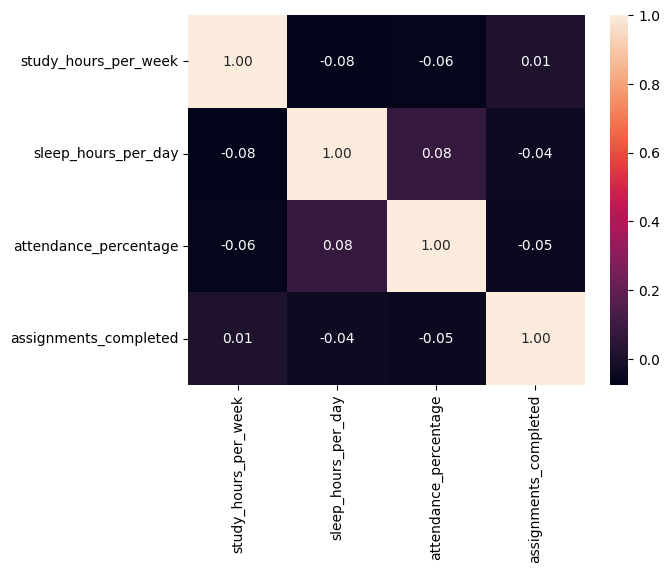

In [18]:
corr=df[num_cols].corr()
sns.heatmap(corr,fmt='.2f',annot=True)
plt.show()

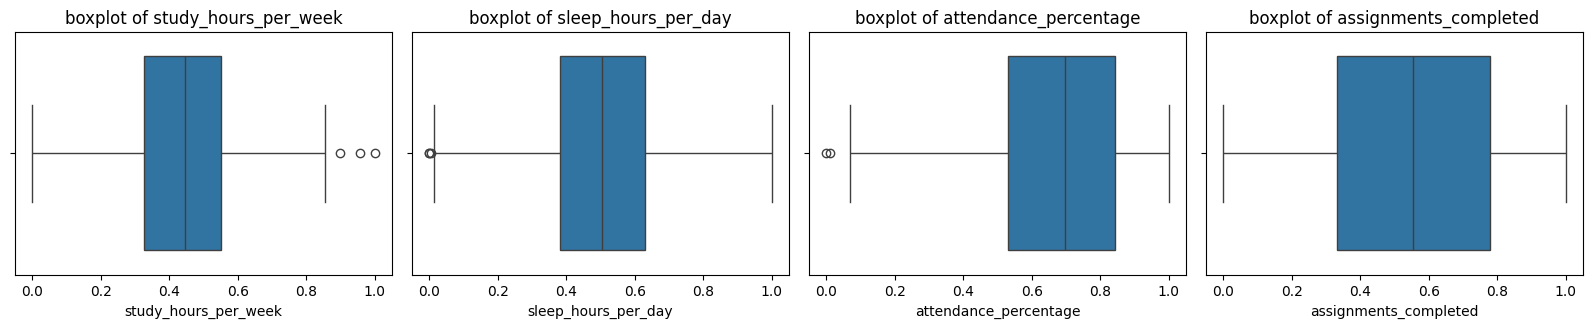

In [19]:
plotnum=1
plt.figure(figsize=(20,15))
for i in num_cols:
    plt.subplot(5,5,plotnum)
    plotnum+=1
    sns.boxplot(x=i,data=df)
    plt.title(f'boxplot of {i}')
    plt.xlabel(i)
plt.tight_layout()
plt.show()

In [20]:
def cap_outliers(df, columns):
    df_capped = df.copy()
    for col in columns:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mean_value = df_capped[col].mean()
        df_capped[col] = df_capped[col].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)
    return df_capped
df=cap_outliers(df,['study_hours_per_week','sleep_hours_per_day','attendance_percentage'])

In [21]:
df['result'] = pd.cut(df['final_grade'],bins=[0, 55, 100],labels=['Fail','Pass'])
le_target = LabelEncoder()
df['result'] = le_target.fit_transform(df['result'])
X = df.drop(columns=['result', 'final_grade'])
y=df['result']

In [22]:
from imblearn.over_sampling import RandomOverSampler
smote = RandomOverSampler()
X_res, y_res = smote.fit_resample(X, y)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=1000, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
precision_weighted = precision_score(y_test, y_pred_rf, average='weighted')
print(f"Precision: {precision_weighted:.2f}")

Random Forest Accuracy: 0.98
Precision: 0.98


# Naive Bayes

In [24]:
X=df[num_cols]
y=df['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print(f"GaussianNB Accuracy (numeric features only): {accuracy_score(y_test, y_pred_nb):.2f}")
precision_weighted_nb = precision_score(y_test, y_pred_nb, average='weighted')
print(f"Precision: {precision_weighted_nb:.2f}")

GaussianNB Accuracy (numeric features only): 0.91
Precision: 0.85


# Random forest has high accuracy score compared to Naive Bayes